# Лабораторная работа № 7
# Математический анализ

## Задание №1
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот, отметить и подписать точки экстремума и точки перегиба,
включить функцию и асимптоты в легенду. 

$$
y=x^2e^{-x}
$$

In [90]:
from sympy import*
import matplotlib.pyplot as plt
import numpy as np

Минимальный предел: 
oo
Максимальный предел: 
0
Перегибы
[2 - sqrt(2), sqrt(2) + 2]


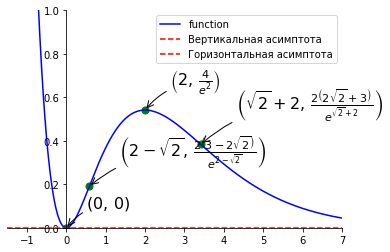

In [91]:
def LinspaceX(xmin, xmax):
    return np.linspace(xmin, xmax, 2048)

def Linspace(xmin, xmax):
    x = get_linspace_x(xmin,xmax)
    return (x, x**2 * np.exp(-x))

def LimitInfo(f, x, Linspace, xmin, xmax, excludePt = 10000, zone = 0.01):    
    marg = 0
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.spines['left'].set_position(('data',0))    
    #function
    if excludePt < 10000:
        npx = LinspaceX(xmin, xmax)
        npxl, npyl = Linspace(xmin, excludePt - zone)
        npxr, npyr = Linspace(excludePt + zone, xmax)
        plt.plot(npxl, npyl, color = 'blue', label = "function)")
        plt.plot(npxr, npyr, color = 'blue', label = "function")
    else:
        npx, npy = Linspace(xmin, xmax)
        plt.plot(npx, npy, color='blue', label="function")
    try:
        minlim = limit(f, x, -oo)
        maxlim = limit(f, x, +oo)
        print("Минимальный предел: ") 
        print(minlim)
        print("Максимальный предел: ")
        print(maxlim)
        plt.axvline(x = minlim, color = 'red', linestyle="--", label = "Вертикальная асимптота")
        plt.axhline(y = maxlim, color = 'red', linestyle="--", label = "Горизонтальная асимптота")
    except Exception:
        print("Пределов нет")
    try:
        kpos = limit(f / x, x, +oo)
        kneg = limit(f / x, x, -oo)
        if kpos == kneg:
            k = kpos
            if (type(k) != list) and abs(k) < oo:
                b = limit(f - k * x, x, oo)
                if abs(b) < oo:
                    plt.plot(npx, k * npx + b, '--r', label="асимптота")
                    print("Угловой предел")
                    print(b)
    except Exception:
        print("Угловой предел не определен")
    try:
        df = diff(f, x)
        dfroots = list(solveset(df, x))
        dfroots.sort()
        points = [dfroots[0] - 1]
        for i in range(len(dfroots) - 1):
            points += [(dfroots[i] + dfroots[i + 1]) / 2]
        points += [dfroots[len(dfroots) - 1] + 1]
        maxArr = []
        minArr = []
        for i in range(len(dfroots)):
            if df.subs(x, points[i]) > 0 and df.subs(x, points[i + 1]) < 0:
                maxArr += [dfroots[i]]
            elif df.subs(x, points[i])<0 and df.subs(x,points[i + 1]) > 0:   
                minArr += [dfroots[i]]  
        marg = PointsPrint(f, x, "green", minArr, marg)
        marg = PointsPrint(f, x, "green", maxArr, marg)
    except Exception:
        print("Экстремум 1 не существует")
    try:
        df2 = diff(f, x, 2)
        df2roots = list(solveset(df2, domain = S.Reals))
        df2roots.sort()    
        points2 = [df2roots[0] - 1]
        for i in range(len(df2roots) - 1):
            points2 += [(df2roots[i] + df2roots[i + 1]) / 2]
        points2 += [df2roots[len(df2roots) - 1] + 1]
        inflection=[]
        for i in range(len(df2roots)):
            if df2.subs(x, points2[i]) > 0 and df2.subs(x, points2[i + 1]) < 0:   
                inflection += [df2roots[i]]
            elif df2.subs(x, points2[i]) < 0 and df2.subs(x, points2[i + 1]) > 0:
                inflection += [df2roots[i]]
        marg = PointsPrint(f, x, "green", inflection, marg)
        print("Перегибы")
        print(inflection)
    except Exception:
        print("Экстремум 2 не существует")
    plt.legend(loc = 'best')

def PointsPrint(func, x, pointColor, pointArr, marg):
    for i in pointArr:
        inf = simplify(expand(func.subs(x, i)))
        if i < 0:
            text = (-120 - marg, -30 - marg)
        else:    
            text = (20 + marg, 20 + marg)
        marg += 5

        plt.scatter([i], [inf], 50, color = pointColor)
        plt.annotate(r'$\left('+ latex(i)+',\,'+ latex(inf) + r'\right)$',xy = (i, inf), xycoords = 'data',
                 xytext = text, textcoords = 'offset points', fontsize = 16,
                 arrowprops = dict(arrowstyle = "->", connectionstyle = "arc3,rad=.2"))
    return marg

x = symbols("x")
plt.ylim(0, 1)
plt.xlim(-1.5, 7)
LimitInfo(x**2 * exp(-x), x, Linspace, -1.5, 9)

## Задание №2
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот, отметить и подписать точки экстремума и точки перегиба,
включить функцию и асимптоты в легенду. 
$$
y=xe^{2/x}+1 
$$

Минимальный предел: 
-oo
Максимальный предел: 
oo
Угловой предел
3
Экстремум 1 не существует
Экстремум 2 не существует


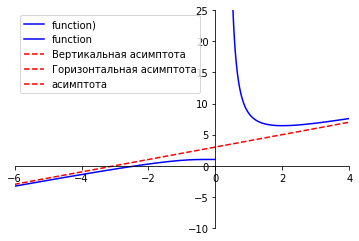

In [88]:
def Linspace(xmin, xmax):
    x = LinspaceX(xmin,xmax)
    return (x, x * np.exp(2 / x) + 1)

plt.ylim(-10, 25)
plt.xlim(-6, 4)
LimitInfo(x * exp(2 / x) + 1, x, Linspace, -20, 20, 0.01, 0)

## Задание №3
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот, отметить и подписать точки экстремума и точки перегиба,
включить функцию и асимптоты в легенду. 
$$
y=x\log_2(4+2/x)
$$

Минимальный предел: 
-oo
Максимальный предел: 
oo
Угловой предел
1/(2*log(2))
Экстремум 1 не существует
Экстремум 2 не существует


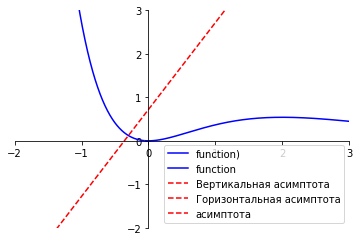

In [87]:
def Linspace(xmin, xmax):
    x = LinspaceX(xmin,xmax)
    return (x, x * np.log2(4 + 2 / x))

plt.ylim(-2, 3)
plt.xlim(-2, 3)
LimitInfo(x * log(4 + 2 / x, 2), x, Linspace, -4, 4, -1 / 16)

## Индивидуальное задание
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот (если есть), отметить и подписать точки экстремума и точки перегиба (если есть),
включить функцию и асимптоты (если есть) в легенду. 
   

Минимальный предел: 
-oo
Максимальный предел: 
oo
Угловой предел
-2
Экстремум 1 не существует
Перегибы
[3*147**(1/3)/5 + 7*63**(1/3)/5 + 34/5]


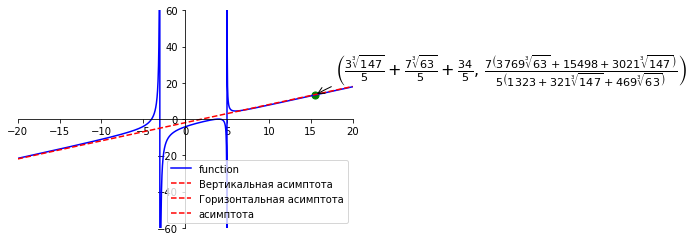

In [85]:
# ((x - 4) * (x**2 - 16))/((x - 5) * (x + 3))
def Linspace(xmin, xmax):
    x = np.linspace(xmin, xmax, 2048)
    return (x, ((x - 4) * (x - 4) * (x + 4))/((x - 5) * (x + 3)))

plt.ylim(-60, 60)
plt.xlim(-20, 20)
LimitInfo(((x - 4) * (x - 4) * (x + 4))/((x - 5) * (x + 3)), x, Linspace, -20, 20)